In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from statistics import mean, variance
from sklearn.preprocessing import normalize

In [2]:
pandas = pd.read_csv('../Data/weather.csv', sep=',')
pandas

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,NW,7.0,...,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0,No
362,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,NNW,2.0,...,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0,No
363,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,ENE,11.0,...,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0,No
364,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,WNW,6.0,...,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0,No


In [3]:
header = list(pandas.columns)
header = [header[i] for i in range(len(header)-3)]
for value in header: print(value, end="  ")

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  

**Function**: convert data into number

In [4]:
def convertData(currentData):
    if type(currentData[0])!=type("STRING"):
        return currentData
    data = list()
    newData = list()
    for value in currentData:
        if (value not in data):
            data.append(value)
        newData.append(data.index(value))
    return newData

In [5]:
def PreProcessingData():
    NaN_data = list()
    for i in range(len(header)):
        data = list(pandas[header[i]])
        for j in range(len(data)):
            if (type(data[0])==type("STRING")): break
            if (math.isnan(data[j])):
                NaN_data.append(header[i])
                break
    [header.remove(NaN) for NaN in NaN_data]

**Function**: convert list into Noralization list

In [6]:
def Normalization(listValue):
    return [np.float64((value-mean(listValue))/(np.std(listValue))) for value in listValue]

**Function**: Sigmoid function

In [7]:
def Sigmoid(x):
    return 1/(1+(math.e)**(-x))

def Hypothesis(x):
    return Sigmoid(x)

In [8]:
def getPercentage(value, portion):
    return portion*value/100

def TransposeMatrix(X):
    return [[X[j][i] for j in range(len(X))] for i in range(len(X[0]))]

**Function:** Cost follow the below function: <br>
$$
J(\theta) = -\frac{1}{m} [\sum \limits_{i=1}^{m} {y}^{(i)} log(h\theta({x}^{(i)})) + (1 - {y}^{(i)})*log(1 - h\theta ({x}^{(i)}))]
$$

In [9]:
def Cost(x, y):
    return y*math.log(Hypothesis(x)) + (1-y)*math.log(1-Hypothesis(x))

def CostSimplified(listX, listY):
    return -1/len(listX) * math.fsum([Cost(x, y) for x, y in zip(listX, listY)])


**Operation**: Get all data in x and y, then split 70% for train data and 30% for test data

In [10]:
PreProcessingData()

x = [convertData(list(pandas[feature])) for feature in header]
y = [1 if value=="Yes" else 0 for value in pandas['RainToday']]

TrainNumber = int(getPercentage(len(x[0]), 70))
TestNumber = int(getPercentage(len(x[0]), 30))

train_x = [[feature[i] for i in range(TrainNumber)] for feature in x]
test_x = [[feature[i] for i in range(TestNumber, len(x[0]))] for feature in x]

train_y = [y[i] for i in range(TrainNumber)]
test_y = [y[i] for i in range(TestNumber, len(y))]

#default theta would be 1
thetaList = [1 for _ in range(len(x))]

In [11]:
train_x = TransposeMatrix(train_x)
test_x = TransposeMatrix(test_x)

<h2>Gradient Descent</h2> <br>
Follow up the J(0) above, we continue adjust value of all theta via: <br>

$$
\theta j = \theta j - \alpha \frac{\delta}{\delta\theta j} J(\theta)
$$
$$
\Leftrightarrow \theta j = \theta j - \alpha \sum \limits_{i=1}^{m} (h\theta({x}^{(i)}) - {y}^{(i)}){xj}^{(i)}
$$

In [12]:
def GradienDescent(x, y, thetaList, learningRate=0.001, iters=10):
    def NewTheta(theta, j, Sum=0):
        for i in range(len(x)):
            normal = normalize([x[i]])[0]
            xi = math.fsum([theta*value for theta, value in zip(thetaList, normal)])
            h0 = Hypothesis(xi)
            Sum += (h0-y[i])*normal[j]
        return theta-learningRate*Sum

    for iter in range(0, iters):
        listX, listY = list(), y 
        for i in range(len(x)):
            normal = normalize([x[i]])[0]
            listX.append(math.fsum([value*theta for theta, value in zip(thetaList, normal)]))

        cost = CostSimplified(listX, listY)
        #adjust the theta value
        thetaList = [NewTheta(thetaList[j], j) for j in range(len(thetaList))]
         
        if (cost<=0): return thetaList
        if iter%1==0:
            print(f"Cost of test {iter}: {cost}")
    return thetaList

thetaResult = GradienDescent(train_x, train_y, thetaList)

Cost of test 0: 1.4516097420042193
Cost of test 1: 1.3509756855428907
Cost of test 2: 1.258094451958853
Cost of test 3: 1.1730550716037649
Cost of test 4: 1.0957937034890763
Cost of test 5: 1.02610194157841
Cost of test 6: 0.9636458507561243
Cost of test 7: 0.9079924851879014
Cost of test 8: 0.8586399010256768
Cost of test 9: 0.8150468685510021


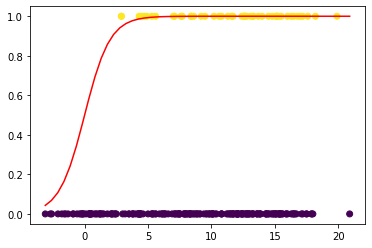

In [13]:
#print(len(train_y))
def NormalizeInRange(x, range=100):
    return [(value-min(x))/(max(x)-min(x))*range for value in x]

# a = NormalizeInRange([math.fsum([value for value in row]) for row in train_x])
a = [row[0] for row in train_x]
b = train_y
plt.scatter(a, b, alpha=1,c=b, cmap='viridis')
n = np.linspace(min(a), max(a))
m = [Sigmoid(value) for value in n]

plt.plot(n, m, color="red")